![Futuristic electric car charging](ev_charging.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, understanding trends in charging facilities and sales is essential to inform strategic planning.

As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. 
___

### The Data
&nbsp;

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

In [45]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   year  private_ports  ...  public_ports  public_station_locations
0  2014         3695.0  ...         22470                      9207
1  2015         4150.0  ...         26532                     10710
2  2016         5763.0  ...         33165                     13150
3  2017         6048.0  ...         45789                     16170
4  2018         6812.0  ...         56842                     19893
5  2019         9955.0  ...         73838                     23282
6  2020        10647.0  ...         96190                     28602
7  2021        18867.0  ...        114451                     46407
8  2022        19993.0  ...        136513                     53764

[9 rows x 5 columns]
         sales
year          
2011   17763.0
2012   53171.0
2013   97102.0
2014  118882.0
2015  114023.0
2016  159616.0
2017  195581.0
2018  361315.0
2019  326644.0
361315.0
   year  private_ports  ...  public_station_locations     sales
0  2014         3695.0  ...                      9207  11888

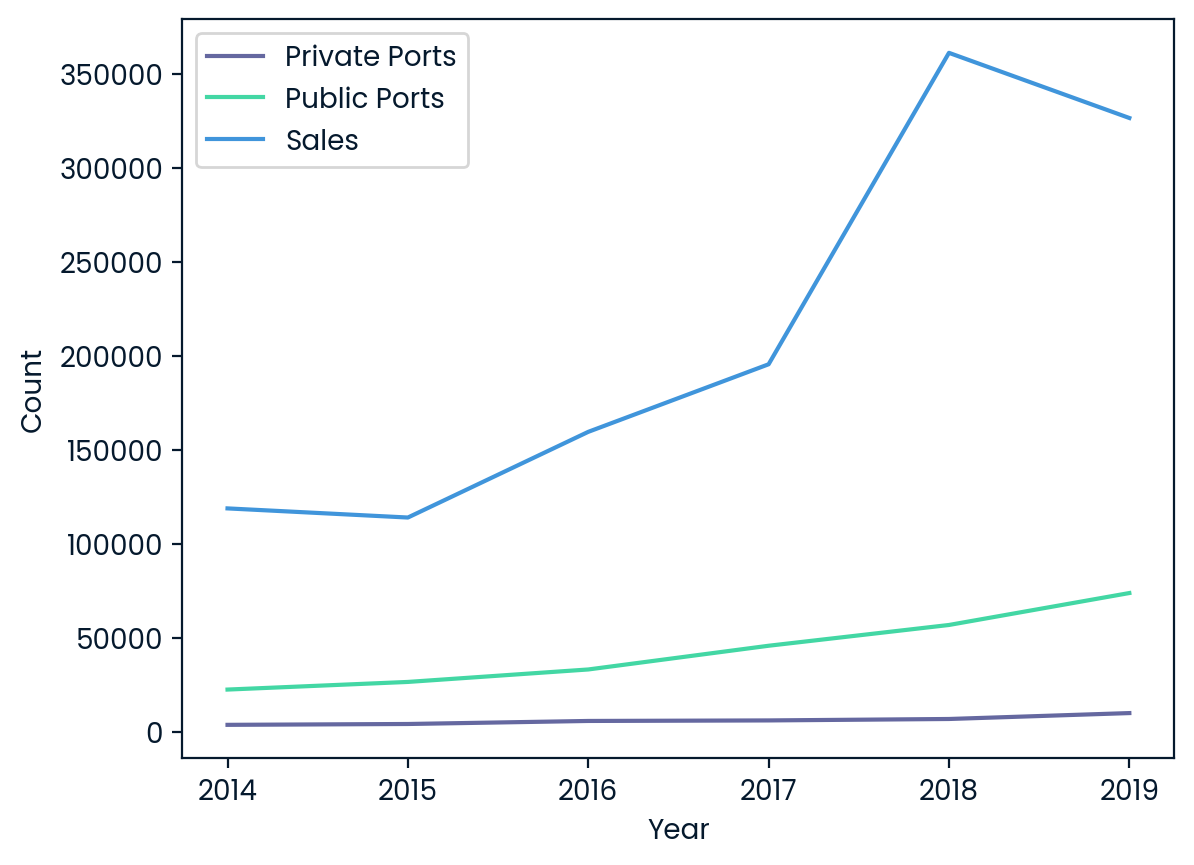

In [46]:
df_prv = pd.read_csv("private_ev_charging.csv")
df_pub = pd.read_csv("public_ev_charging.csv")
df_sales = pd.read_csv("ev_sales.csv")
df_pp = df_prv.merge(df_pub, on="year", how="outer", suffixes=("_prv", "_pub"), indicator=True)
df_tmp = df_pp[df_pp["_merge"] == "both"]
df_tmp = df_tmp.drop(columns=["_merge"])
df_pp = df_tmp
print(df_pp)
df_sales_agg = df_sales.groupby("year").aggregate("sum")
ev_sales_2018 = df_sales_agg.iloc[-2][0]
print(df_sales_agg)
print(ev_sales_2018)
df_pps = df_pp.merge(df_sales_agg, on="year", how="left")
df_pps = df_pps.dropna()
print(df_pps)
fig, ax = plt.subplots()
sns.lineplot(data=df_pps, x="year", y="private_ports", label="Private Ports")
sns.lineplot(data=df_pps, x="year", y="public_ports", label="Public Ports")
sns.lineplot(data=df_pps, x="year", y="sales", label="Sales")
ax.set(xlabel="Year", ylabel="Count")
plt.show()
trend = "same"